#	Some tries to check whether principal components are correlated

In [1]:
import sys
import lalsimulation as lalsim
import lal
sys.path.insert(1, '/home/stefano/Desktop/Stefano/scuola/uni/tesi_magistrale/code/routines')
from GW_helper import *
import matplotlib.pyplot as plt
import keras

from ML_routines import *
from EM_MoE import *

Using TensorFlow backend.


In [2]:
theta_vector, amp_dataset, ph_dataset, frequencies = load_dataset("../datasets/GW_TD_dataset_short_al_merger/GW_TD_dataset_short_al_merger.dat", shuffle=False, N_grid = None) #loading dataset

print("Loaded data with shape: "+ str(ph_dataset.shape))

train_frac = .85

train_theta, test_theta, train_amp, test_amp = make_set_split(theta_vector, amp_dataset, train_frac, 1e-21)
train_theta, test_theta, train_ph, test_ph   = make_set_split(theta_vector, ph_dataset, train_frac, 1.)

Loaded data with shape: (7210, 3000)


In [35]:
    #fitting comp
K= 2 #number of experts
feat_num = 2900
y_train = train_ph[:,feat_num]
y_test = test_ph[:,feat_num]

new_features = ["00", "11","22", "01", "02", "12"
,"000", "001", "002", "011", "012", "022", "111", "112", "122", "222"
,"0000", "0001","0002", "0011", "0022","0012","0111","0112", "0122", "0222","1111", "1112", "1122", "1222", "2222"]
#   ,"00000", "00010","00020", "00110", "00220","00120","01110","01120", "01220", "02220","11110", "11120", "11220", "12220", "22220" 
#   ,"00001", "00011","00021", "00111", "00221","00121","01111","01121", "01221", "02221","11111", "11121", "11221", "12221", "22221" 
#   ,"00002", "00012","00022", "00112", "00222","00122","01112","01122", "01222", "02222","11112", "11122", "11222", "12222", "22222" ]
outfile = open("./saved_models_full_ph_TD/ph_feat", "w+")
train_theta_big = add_extra_features(train_theta, new_features)
test_theta_big = add_extra_features(test_theta, new_features)

model = MoE_model(3+len(new_features),K)
args = ["adam", None,   0e-4, False,  1e-4,		150,    2e-3]
model.fit(train_theta_big, y_train, threshold = 1e-2, args = args, 
          verbose = True, val_set = (test_theta_big,y_test))
y_pred = model.predict(test_theta_big)

LL at iter 1=  (0.9256624278682227, 0.8569980185985919)
   Gating loss:  (0.5245970914924567,) (0.5018276833759903,)
   Val loss:  0.013331629980262168
Chosen the best!
LL at iter 2=  (1.0654345084221302, 0.9885178709587341)
   Gating loss:  (0.5408836468689923,) (0.5283257199772435,)
   Val loss:  0.0130346631971334
Chosen the best!
LL at iter 3=  (1.2342737541147903, 1.142243399809415)
   Gating loss:  (0.5439112890535934,) (0.534283934363262,)
   Val loss:  0.012540941190898559
Chosen the best!
LL at iter 4=  (1.3933289356416119, 1.2900316538835541)
   Gating loss:  (0.5191646523306115,) (0.5026779122844546,)
   Val loss:  0.011905683763908723
Chosen the best!
LL at iter 5=  (1.4904076602531944, 1.3966941736743916)
   Gating loss:  (0.4487581589182535,) (0.4284407846695639,)
   Val loss:  0.010991681175806234
Chosen the best!
LL at iter 6=  (1.5398676077143967, 1.4556898818016994)
   Gating loss:  (0.375513626235023,) (0.3577522812990671,)
   Val loss:  0.009964180213497726
Chosen t

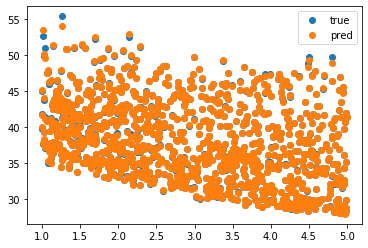

0.008893482744759713


In [36]:
feat = 0 #1,2 index of feature to plot everything against
plt.figure()
#%matplotlib notebook
plt.plot(test_theta_big[:,feat],y_test,'o', label="true")
plt.plot(test_theta_big[:,feat],y_pred, 'o',label="pred")
plt.legend()
plt.show()

#computing errors
mse = np.sum(np.square( (y_test-y_pred)))/(y_test.shape[0])
print(mse)

In [ ]:
folder = "GW_TD_dataset/"
train_theta = np.loadtxt("../datasets/"+folder+"PCA_train_theta_full.dat")
test_theta = np.loadtxt("../datasets/"+folder+"PCA_test_theta_full.dat")
PCA_train_ph = np.loadtxt("../datasets/"+folder+"PCA_train_full_ph.dat")
PCA_test_ph = np.loadtxt("../datasets/"+folder+"PCA_test_full_ph.dat")
PCA_train_amp = np.loadtxt("../datasets/"+folder+"PCA_train_full_amp.dat")
PCA_test_amp = np.loadtxt("../datasets/"+folder+"PCA_test_full_amp.dat")

print(np.max(train_theta[:,1]), np.min(train_theta[:,1]))

In [ ]:
#%matplotlib notebook
plt.plot(test_theta[:,0],PCA_test_ph[:,3], 'o')
plt.show()

In [ ]:
print(train_theta[np.where(PCA_train_ph[:,3]<-0.1)])

In [ ]:
train_indices = np.where((np.multiply(test_theta[:,1]<-0.74, test_theta[:,0]>4.5)))
print(train_indices)
print(test_theta[train_indices,:])

In [ ]:
print(test_theta[:,0])